# digit-recognizer

## Data fetching with analytic explanation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras import backend as K
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from keras.optimizers import SGD

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

sns.set()

%matplotlib inline

Using TensorFlow backend.


In [2]:
# check current keras backend 
K.backend()

'tensorflow'

In [3]:
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')

In [4]:
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_train.shape

(42000, 785)

In [7]:
data_test.shape

(28000, 784)

In [8]:
data_train.dtypes.head()

label     int64
pixel0    int64
pixel1    int64
pixel2    int64
pixel3    int64
dtype: object

## Simple input digits visualization

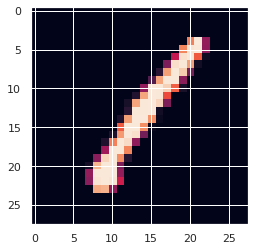

In [9]:
plt.imshow(data_train.drop(columns=['label'], axis=1).loc[0].values.reshape(28,28))

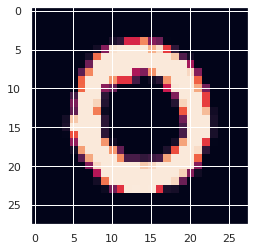

In [10]:
plt.imshow(data_train.drop(columns=['label'], axis=1).loc[1].values.reshape(28,28))

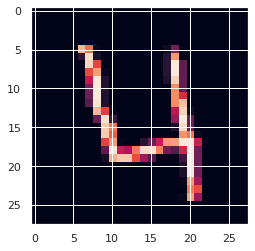

In [11]:
plt.imshow(data_train.drop(columns=['label'], axis=1).loc[3].values.reshape(28,28))

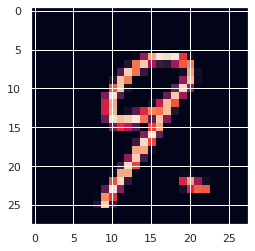

In [12]:
plt.imshow(data_test.loc[2].values.reshape(28,28))

## Data Modelling with Preprocessing

In [13]:
X_train = data_train.drop(columns=['label'], axis=1)
X_test = data_test
y_train = data_train['label']

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
X_train = X_train.values.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28,1)

In [16]:
X_train.shape

(42000, 28, 28, 1)

In [17]:
X_test.shape

(28000, 28, 28, 1)

In [18]:
y_train = to_categorical(y_train, num_classes=10, dtype='int64')

In [19]:
y_train

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [20]:
# # Image Data Generator (augmentation)

# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True)

In [21]:
# datagen.fit(X_train, augment=True)

## Model Initialization

In [22]:
# Pooling layer
# BatchNormalization() ?
# Conv2D ... Dense with softmax

In [23]:
model = Sequential()

W0706 17:56:34.877942 140315644442432 deprecation_wrapper.py:119] From /home/wjmaj/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [24]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

W0706 17:56:34.912388 140315644442432 deprecation_wrapper.py:119] From /home/wjmaj/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 17:56:34.922276 140315644442432 deprecation_wrapper.py:119] From /home/wjmaj/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0706 17:56:34.951122 140315644442432 deprecation_wrapper.py:119] From /home/wjmaj/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0706 17:56:34.954470 140315644442432 deprecation_wrapper.py:119] From /home/wjmaj/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0706 17

In [25]:
sgd = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)

## Evaluation

In [26]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

W0706 17:56:35.075685 140315644442432 deprecation_wrapper.py:119] From /home/wjmaj/.local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0706 17:56:35.084413 140315644442432 deprecation_wrapper.py:119] From /home/wjmaj/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [27]:
model.fit(X_train, y_train, batch_size=32, epochs=100)
# model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train)/42, epochs=100)

W0706 17:56:35.252958 140315644442432 deprecation.py:323] From /home/wjmaj/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
42000/42000 [==============================] - 68s 2ms/step - loss: 0.3143 - acc: 0.8981
Epoch 2/100
42000/42000 [==============================] - 93s 2ms/step - loss: 0.0997 - acc: 0.9691
Epoch 3/100
42000/42000 [==============================] - 90s 2ms/step - loss: 0.0740 - acc: 0.9767
Epoch 4/100
42000/42000 [==============================] - 87s 2ms/step - loss: 0.0589 - acc: 0.9823
Epoch 5/100
42000/42000 [==============================] - 88s 2ms/step - loss: 0.0507 - acc: 0.9845
Epoch 6/100
42000/42000 [==============================] - 97s 2ms/step - loss: 0.0460 - acc: 0.9856
Epoch 7/100
42000/42000 [==============================] - 95s 2ms/step - loss: 0.0406 - acc: 0.9873
Epoch 8/100
42000/42000 [==============================] - 85s 2ms/step - loss: 0.0373 - acc: 0.9882
Epoch 9/100
42000/42000 [==============================] - 91s 2ms/step - loss: 0.0346 - acc: 0.9892
Epoch 10/100
42000/42000 [==============================] - 92s 2ms/step - loss: 0.0306 - a

42000/42000 [==============================] - 87s 2ms/step - loss: 0.0073 - acc: 0.9978
Epoch 82/100
42000/42000 [==============================] - 85s 2ms/step - loss: 0.0052 - acc: 0.9982
Epoch 83/100
42000/42000 [==============================] - 89s 2ms/step - loss: 0.0064 - acc: 0.9979
Epoch 84/100
42000/42000 [==============================] - 105s 2ms/step - loss: 0.0057 - acc: 0.9984
Epoch 85/100
42000/42000 [==============================] - 88s 2ms/step - loss: 0.0070 - acc: 0.9978
Epoch 86/100
42000/42000 [==============================] - 92s 2ms/step - loss: 0.0053 - acc: 0.9983
Epoch 87/100
42000/42000 [==============================] - 90s 2ms/step - loss: 0.0068 - acc: 0.9978
Epoch 88/100
42000/42000 [==============================] - 96s 2ms/step - loss: 0.0062 - acc: 0.9980
Epoch 89/100
42000/42000 [==============================] - 90s 2ms/step - loss: 0.0064 - acc: 0.9977
Epoch 90/100
42000/42000 [==============================] - 88s 2ms/step - loss: 0.0046 - acc:

## Feedback

In [28]:
# score = model.evaluate(X_train, y_train, batch_size=32)

In [29]:
predictions = model.predict_classes(X_test)
predictions

array([2, 0, 9, ..., 3, 9, 2])

In [30]:
# score

In [31]:
pd.DataFrame(predictions).to_csv('submission_new.csv')